# HW 8 Problem 1
## Austin Marga

In [1]:
from integrals import *
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


I could have been more pythonic by introducing some `if` statements to group the 6 functions into 2, but I had some problems with this for implementation.

## $f(x) = e^x \quad [0,10]$
First, let's plot the function $f(x) = e^x$.

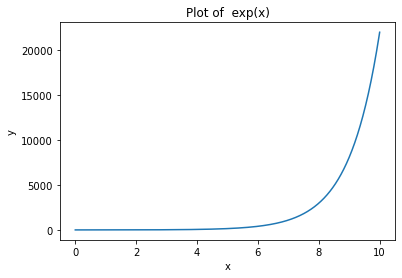

In [2]:
a = 0
b = 10
x = np.linspace(a,b,1000)
y = np.exp(x)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of  exp(x)")
plt.plot(x,y)
plt.show()

In order to plot the antiderivative of some function, we can use the Fundamental Theorem of Calculus.
$$\int_a^b f(x)dx = F(b) - F(a)$$
We can calculate the integral of some function numerically by approximating the area of the curve, we only need to know the value of the antiderivative at some point $a$. The antiderivative is a family of functions varying by some constant, so we can specify one by specifying one point (a,F(a)).

All other points can be calculated from this.

$$F(b) = \int_a^b f(x)dx + F(a)$$

For these examples, let $a$ be the left boundary of the point, and let $b$ be some point $x$ at which we want the antiderivative.

$F(x) = \int e^x dx = e^x + C$. If we drop the constant, the integral of $e^x$ is just $e^x$. Therefore, the integral should look the same as the original plot. 

The real answer for $F = \int_0^{10} e^x dx \approx 22025.46579480672$. Let's see how close our integration methods get.

In this example, $F(a) = F(0) = 1$, therefore, for any point after this, we can calculate the antiderivative via the following:

$$F(x)  =\int_0^xe^xdx + 1$$

In [3]:
res = simpson(np.exp,0,10,50)
print(res)

22025.66064832975


In [4]:
print(type(x))

<class 'numpy.ndarray'>


In [5]:
def integrate_simp(f,a,b,n,C):
    """
    Generates a list of x and y values of the antiderivative using the Simpson Rule.
    
    args:
    f: some (lambda) function
    a: left end point
    b: right end point
    n: number of partitions along the x-axis
    C: The value of the antiderivative at the left end point to uniquely describe the curve.
    
    output:
    returns a list of lists, with the first entry being the x values 
    and the second entry being the y values for the antiderivative plot
    
    
    """
    y = []
    x = []
    step_size = (b-a) / n
    m = 0
    for step in arange(0,n):
        step_left = a+m*step_size
        step_right = a + (m+1)*step_size
        val = simpson(f,a,step_right,200) + C
        y.append(val)
        x.append(step_right)
        m = m+1
    x = numpy.array(x)
    y = numpy.array(y)
    return [x,y]

Here, in order to calculate accuracy, I use the `scipy.integrate` function. This has to be outside of the function because of the difference in syntax between `numpy` and `scipy` for $e^x$, being `np.exp` and `np.exp(x)` respectively.

In [6]:
real = integrate.quad(lambda x: np.exp(x), 0, 10)
print(real)

(22025.465794806725, 6.239389118119916e-10)


In [7]:
def integrate_simp_and_plot(f,a,b,n,name,C):
    """
    Generates a list of x and y values of the antiderivative using the Simpson Rule and plots the antiderivative.
    
    args:
    f: some (lambda) function
    a: left end point
    b: right end point
    n: number of partitions along the x-axis
    name: The name of the function as a string.
    C: The value of the antiderivative at the left end point to uniquely describe the curve.
    
    output:
    returns a numerical approximation for the integration.
    
    
    """
    val = integrate_simp(f,a,b,n,C)
    x = val[0]
    y = val[1]
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Plot of Integral of " + str(name))
    plt.plot(x,y)
    plt.show()
    integral = simpson(f,a,b,n)
    print("The integration of {} by the Simpson Rule with {} steps is {}".format(str(f),n,integral))
    return integral

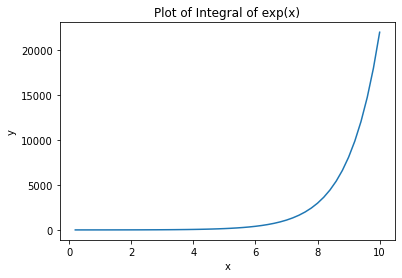

The integration of <ufunc 'exp'> by the Simpson Rule with 50 steps is 22025.66064832975


In [8]:
a = 0
b = 10
n = 50
integral = integrate_simp_and_plot(np.exp,a,b,n,"exp(x)",1)

In [9]:
real = integrate.quad(lambda x: np.exp(x), a, b)
acc = 1 - np.abs((integral - real[0])) / real[0]
perc = str(100*acc)+"%"
print("The real value of the integration is {} with an error of {}.".format(real[0],real[1]))
print("The accuracy of the Simpson Rule with {} steps is {}.".format(n,perc))

The real value of the integration is 22025.465794806725 with an error of 6.239389118119916e-10.
The accuracy of the Simpson Rule with 50 steps is 99.99911532620995%.


Here, we define accuracy to be $$\text{acc} = 1 - \frac{|{\text{theoretical} - \text{experimental}|}}{\text{theoretical}}$$

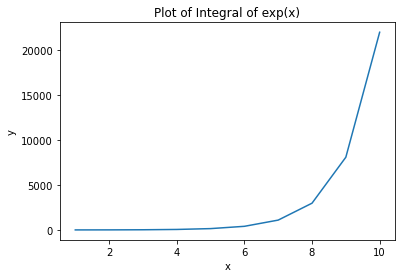

The integration of <ufunc 'exp'> by the Simpson Rule with 10 steps is 22134.650007857348
The real value of the integration is 22025.465794806725 with an error of 6.239389118119916e-10.
The accuracy of the Simpson Rule with 10 steps is 99.50428193406758%.


In [10]:
a = 0
b = 10
n = 10
integral = integrate_simp_and_plot(np.exp,a,b,n,"exp(x)",1)
real = integrate.quad(lambda x: np.exp(x), a, b)
acc = 1 - np.abs((integral - real[0])) / real[0]
perc = str(100*acc)+"%"
print("The real value of the integration is {} with an error of {}.".format(real[0],real[1]))
print("The accuracy of the Simpson Rule with {} steps is {}.".format(n,perc))

We can see that with 10 steps, we can get an acccuracy of greater than 99%.

Let's try now with the Trapezoid Rule.

In [11]:
def integrate_trap(f,a,b,n,C):
    """
    Generates a list of x and y values of the antiderivative using the Trapezoidal Rule.
    
    args:
    f: some (lambda) function
    a: left end point
    b: right end point
    n: number of partitions along the x-axis
    C: The value of the antiderivative at the left end point to uniquely describe the curve.
    
    output:
    returns a list of lists, with the first entry being the x values 
    and the second entry being the y values for the antiderivative plot
    
    
    """
    y = []
    x = []
    step_size = (b-a) / n
    m = 0
    for step in arange(0,n):
        step_left = a+m*step_size
        step_right = a + (m+1)*step_size
        val = trapezoid(f,a,step_right,200) + C
        y.append(val)
        x.append(step_right)
        m = m+1
    x = numpy.array(x)
    y = numpy.array(y)
    return [x,y]

In [12]:
def integrate_trap_and_plot(f,a,b,n,name,C):
    """
    Generates a list of x and y values of the antiderivative using the Trapezoidal Rule and plots the antiderivative.
    
    args:
    f: some (lambda) function
    a: left end point
    b: right end point
    n: number of partitions along the x-axis
    name: The name of the function as a string.
    C: The value of the antiderivative at the left end point to uniquely describe the curve.
    
    output:
    returns a numerical approximation for the integration.
    
    
    """
    val = integrate_trap(f,a,b,n,C)
    x = val[0]
    y = val[1]
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Plot of Integral of " + str(name))
    plt.plot(x,y)
    plt.show()
    integral = trapezoid(f,a,b,n)
    print("The integration of {} by the Trapezoidal Rule with {} steps is {}".format(str(f),n,integral))
    return integral

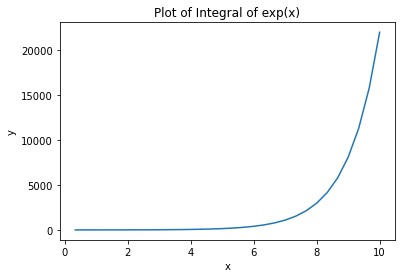

The integration of <ufunc 'exp'> by the Trapezoidal Rule with 30 steps is 22229.028623517694


In [13]:
a = 0
b = 10
n = 30
integral = integrate_trap_and_plot(np.exp,a,b,n,"exp(x)",1)

In [14]:
acc = 1 - np.abs((integral - real[0])) / real[0]
perc = str(100*acc)+"%"
print("The real value of the integration is {} with an error of {}.".format(real[0],real[1]))
print("The accuracy of the Trapezoidal Rule with {} steps is {}.".format(n,perc))

The real value of the integration is 22025.465794806725 with an error of 6.239389118119916e-10.
The accuracy of the Trapezoidal Rule with 30 steps is 99.0757842280958%.


In [15]:
def integrate_adapt_trap(f,a,b,n,C,acc):
    """
    Generates a list of x and y values of the antiderivative using the Adaptive Trapezoidal Rule.
    
    args:
    f: some (lambda) function
    a: left end point
    b: right end point
    n: number of partitions along the x-axis
    C: The value of the antiderivative at the left end point to uniquely describe the curve.
    acc: some accuracy requirement for each partition. This is the same that is used in the adaptive_trapezoid function
    
    output:
    returns a list of lists, with the first entry being the x values 
    and the second entry being the y values for the antiderivative plot
    
    
    """
    y = []
    x = []
    step_size = (b-a) / n
    m = 0
    for step in arange(0,n):
        step_left = a+m*step_size
        step_right = a + (m+1)*step_size
        val = adaptive_trapezoid(f,a,step_right,200) + C
        y.append(val)
        x.append(step_right)
        m = m+1
    x = numpy.array(x)
    y = numpy.array(y)
    return [x,y]

The `adaptive_trapezoid` function takes different arguments than the other integral functions. Here, I let each adaptive trapezoid have an accuracy of $acc = 0.99$.

In [16]:
def integrate_adapt_trap_and_plot(f,a,b,n,acc,name,C):
    """
    Generates a list of x and y values of the antiderivative using the Adaptive Trapezoidal Rule and plots the antiderivative.
    
    args:
    f: some (lambda) function
    a: left end point
    b: right end point
    n: number of partitions along the x-axis
    acc: The accuracy required for one specific partition, as used in the adaptive_trapezoid function.
    name: The name of the function as a string.
    C: The value of the antiderivative at the left end point to uniquely describe the curve.
    
    output:
    returns a numerical approximation for the integration.
    
    
    """
    val = integrate_adapt_trap(f,a,b,n,C,acc)
    x = val[0]
    y = val[1]
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Plot of Integral of " + str(name))
    plt.plot(x,y)
    plt.show()
    integral = trapezoid(f,a,b,n)
    print("The integration of {} by the Adaptive Trapezoidal Rule with {} steps is {}".format(str(f),n,integral))
    return integral

In [17]:
z_1 = adaptive_trapezoid(np.exp,0,10,1,0.99)
z_2 = adaptive_trapezoid(np.exp,0,10,1,.01)
print(z_1,z_2)

22025.64083720381 22025.64083720381


We can see that the `acc` argument does not change the integration value to any serious degree. This is due to the `adaptive_trapezoid` function from `integrals.py`, not from its application here.

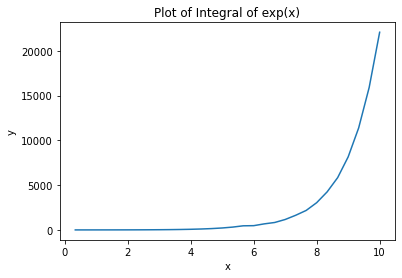

The integration of <ufunc 'exp'> by the Adaptive Trapezoidal Rule with 30 steps is 22229.028623517694


In [18]:
a = 0
b = 10
n = 30
integral = integrate_adapt_trap_and_plot(np.exp,a,b,n,0.99,"exp(x)",1)

In [19]:
acc = 1 - np.abs((integral - real[0])) / real[0]
perc = str(100*acc)+"%"
print("The real value of the integration is {} with an error of {}.".format(real[0],real[1]))
print("The accuracy of the Adaptive Trapezoidal Rule with {} steps is {}.".format(n,perc))

The real value of the integration is 22025.465794806725 with an error of 6.239389118119916e-10.
The accuracy of the Adaptive Trapezoidal Rule with 30 steps is 99.0757842280958%.


### In summary for $f(x) = e^x$
- The Simpson Rule can get an accuracy of over 99% in only 10 steps.
- The Trapezoid Rule can get an accuracy of over 99% in 30 steps.
- The Adaptive Trapezoid Rule can get an accuracy of over 99% in 30 steps given a step accuracy of 99%.

## $f(x) = \sin(\frac{1}{x})\quad (0,2\pi]$ 

We can clearly see that $\sin(1/x)$ as x tends to 0 is not defined, so I shall omit this point and start at $a = 0.0001$.

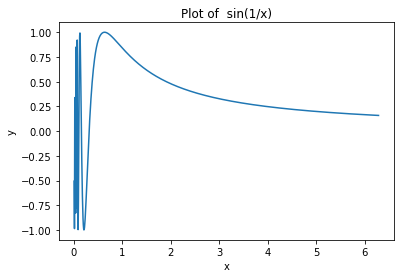

In [20]:
a = 0.01
b = 2*np.pi
x = np.linspace(a,b,1000)
y = np.sin(1/x)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of  sin(1/x)")
plt.plot(x,y)
plt.show()

I don't know what the antiderivative of $sin(1/x)$ at $0.01$ is, so I will just pick the antiderivative curve where such value is 0.

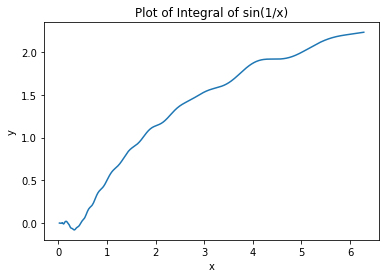

The integration of <function <lambda> at 0x7fec175c0af0> by the Simpson Rule with 500 steps is 2.281012286277705


In [21]:
n = 500
integral = integrate_simp_and_plot(lambda x: np.sin(1/x),a,b,n,"sin(1/x)",0)

We can see that even when plotting the antiderivative, it seems to taper off, consistent with the trends we see from $sin(1/x)$, the limit does not appear to be approaching some value, but the rate of change of the antiderivative is decreasing.

Apparently, `str()` does not like to work for lambda functions.

In [22]:
real = integrate.quad(lambda x: np.sin(1/x), a, b)
acc = 1 - np.abs((integral - real[0])) / real[0]
perc = str(100*acc)+"%"
print("The real value of the integration is {} with an error of {}.".format(real[0],real[1]))
print("The accuracy of the Simpson Rule with {} steps is {}.".format(n,perc))

The real value of the integration is 2.2626857545897185 with an error of 1.474769539892536e-08.
The accuracy of the Simpson Rule with 500 steps is 99.19005404746054%.


It takes over 500 steps in order to get an accuracy of over 99%! We can see just how varying $\sin(1/x)$ really is.

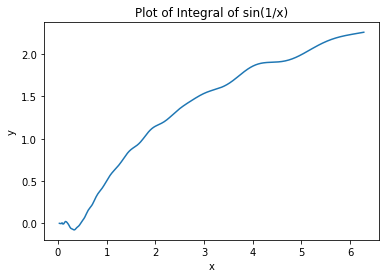

The integration of <function <lambda> at 0x7fec17588820> by the Trapezoidal Rule with 350 steps is 2.2403351708325423


In [23]:
integral = integrate_trap_and_plot(lambda x: np.sin(1/x),a,b,350,"sin(1/x)",0)

In [24]:
acc = 1 - np.abs((integral - real[0])) / real[0]
perc = str(100*acc)+"%"
print("The real value of the integration is {} with an error of {}.".format(real[0],real[1]))
print("The accuracy of the Trapezoidal Rule with {} steps is {}.".format(n,perc))

The real value of the integration is 2.2626857545897185 with an error of 1.474769539892536e-08.
The accuracy of the Trapezoidal Rule with 500 steps is 99.01220999372805%.


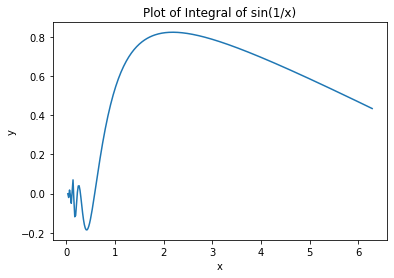

The integration of <function <lambda> at 0x7fec1f7ae550> by the Adaptive Trapezoidal Rule with 350 steps is 2.2403351708325423


In [25]:
integral = integrate_adapt_trap_and_plot(lambda x: np.sin(1/x),a,b,350,0.99,"sin(1/x)",0)

In [26]:
acc = 1 - np.abs((integral - real[0])) / real[0]
perc = str(100*acc)+"%"
print("The real value of the integration is {} with an error of {}.".format(real[0],real[1]))
print("The accuracy of the Adaptive Trapezoidal Rule with {} steps is {}.".format(n,perc))

The real value of the integration is 2.2626857545897185 with an error of 1.474769539892536e-08.
The accuracy of the Adaptive Trapezoidal Rule with 500 steps is 99.01220999372805%.


We can see that the accuracy for the Adaptive Trapezoid is much higher than the Simpson Rule when $n$ is very large and the accuracy of each step is $0.99$ to begin with.

### In summary for $f(x) = \sin(\frac{1}{x})$
- The Simpson Rule can get an accuracy of over 99% in 500 steps.
- The Trapezoid Rule can get an accuracy of over 99% in 350 steps.
- The Adaptive Trapezoid Rule can get an accuracy of over 99% in 350 steps given a step accuracy of 99%.
- The Adaptive Trapezoid Plot is significantly different than the others.

## $f(x) = x^3$

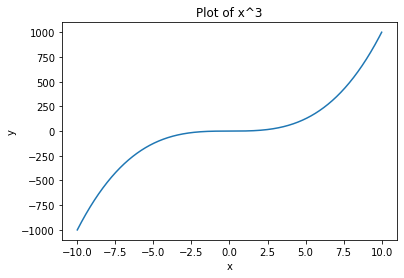

In [27]:
a = -10
b = 10
x = np.linspace(a,b,1000)
y = x**3
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of x^3")
plt.plot(x,y)
plt.show()

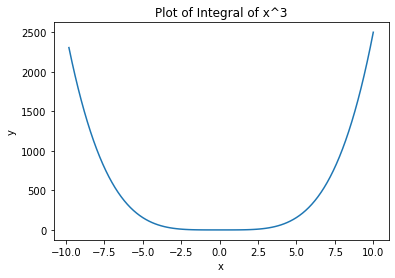

The integration of <function <lambda> at 0x7fec17631550> by the Simpson Rule with 100 steps is 1.076235397097965e-12


In [28]:
n = 100
integral = integrate_simp_and_plot(lambda x: x**3,a,b,n,"x^3",2500)

Since I only plot with the right step values, we see some missing points at the left side of the graph.

In [29]:
real = integrate.quad(lambda x: x**3, a, b)
print(np.abs((integral - real[0])))
print(real[0])
acc = 1 - np.abs((integral - real[0])) / real[0]
perc = str(100*acc)+"%"
print("The real value of the integration is {} with an error of {}.".format(real[0],real[1]))
print("The accuracy of the Simpson Rule with {} steps is {}.".format(n,perc))

1.076235397097965e-12
0.0
The real value of the integration is 0.0 with an error of 5.551208455924673e-11.
The accuracy of the Simpson Rule with 100 steps is -inf%.


/tmp/ipykernel_310/2164958878.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  acc = 1 - np.abs((integral - real[0])) / real[0]


Because the expected value of the integral is $0$, we will get a divide by zero error when measuring accuracy. To remedy this, let's redefine accuracy to be:
$$acc = (1-\text{experimental})\times100$$

In [30]:
new_acc = (1-integral)*100
perc = str(new_acc) + "%"
print("The accuracy of the Simpson Rule with {} steps is {}.".format(n,perc))

The accuracy of the Simpson Rule with 100 steps is 99.99999999989238%.


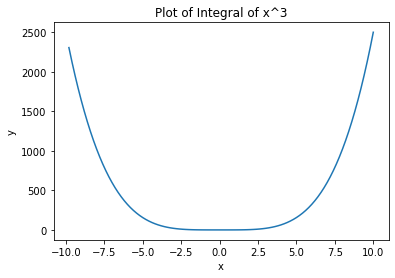

The integration of <function <lambda> at 0x7fec173d4e50> by the Trapezoidal Rule with 100 steps is 9.322320693172516e-13
The accuracy of the Trapezoidal Rule with 100 steps is 99.99999999990678%.


In [31]:
integral = integrate_trap_and_plot(lambda x: x**3,a,b,n,"x^3",2500)
new_acc = (1-integral)*100
perc = str(new_acc) + "%"
print("The accuracy of the Trapezoidal Rule with {} steps is {}.".format(n,perc))

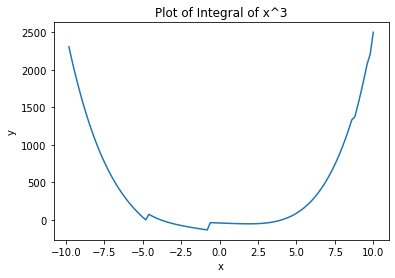

The integration of <function <lambda> at 0x7fec1734b310> by the Adaptive Trapezoidal Rule with 100 steps is 9.322320693172516e-13
100
The accuracy of the Adaptive Trapezoidal Rule with 100 steps is 99.99999999990678%.


In [32]:
integral = integrate_adapt_trap_and_plot(lambda x: x**3,a,b,n,.99,"x^3",2500)
print(n)
new_acc = (1-integral)*100
perc = str(new_acc) + "%"
print("The accuracy of the Adaptive Trapezoidal Rule with {} steps is {}.".format(n,perc))

This measurement for accuracy isn't truly meaningful when comparing to other functions, but it gives us some baseline when comparing integration methods for one function.

### In summary for $f(x) = x^3$
- The trapezoidal rules are ever so slightly more accurate than the simpson rule, but the difference is of the order $10^{-12}$. 
- The plot for the adaptive trapezoid is contorted, but I do not know why.
- All accuracies with 100 steps are of the order $10^{-11}$.